### Looking at Distributions for Quantitative Variable

There are several tools for looking at a single quantitative variable



Load in packages we need for doing graphical representations.  

In [18]:
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter



This Ames Housing Dataset is part of a competition to predict housing prices
https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

The ultimate goal of the project is to predict the sales price of a house in Ames, IA based upon various measurements/features recorded for the house.

Note that these data have some missing values for some of the features/variables.

In [33]:
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
ames.replace([' ?'],np.NaN)
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Histograms

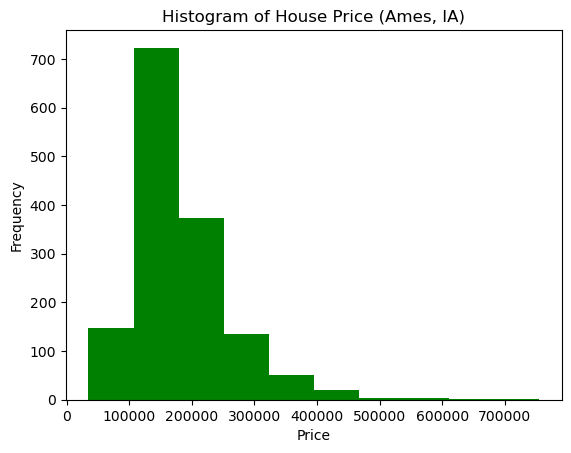

In [20]:
plt.hist(ames['SalePrice'], color="green")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Price (Ames, IA)')
plt.show()



#### Violinplots

In [ ]:
# here we use two options that add the median and the extrema to the plot
plt.violinplot(ames['SalePrice'],showmedians=True, showextrema=True)
#plt.xlabel('Value')
plt.ylabel('Price')
#plt.title('Histogram')
plt.show()


#### Boxplots

In [ ]:
plt.boxplot(ames['SalePrice'], showmeans=True)
plt.xlabel('Value')
#plt.ylabel('Median Age')
#plt.title('Histogram')
plt.show()

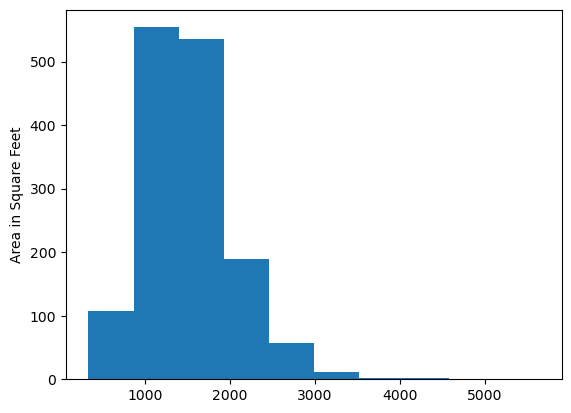

In [23]:
plt.hist(ames['GrLivArea'])
plt.ylabel('Area in Square Feet')
#plt.ylabel('Median Age')
#plt.title('Histogram')
plt.show()

Next we will make a histogram for _GarageYrBlt_ which I think means the year that the garage was built.  The code below is for making this histogram but the X-axis is muddled.

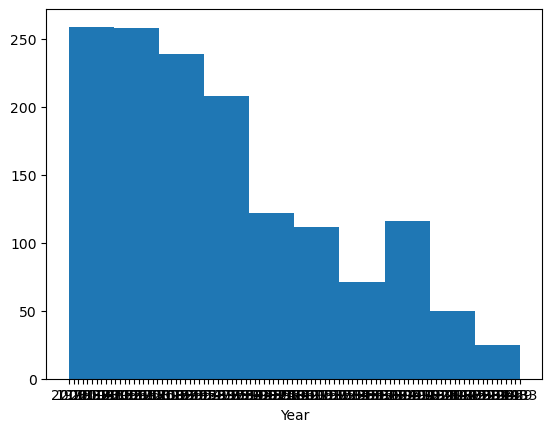

In [24]:
plt.hist(ames['GarageYrBlt'])
plt.xlabel('Year')
#plt.ylabel('Median Age')
#plt.title('Histogram')

plt.show()

So we'll start by getting the smallest (_np.min_) and the largest (_np.max_) values from this feature.

In [38]:
print(np.min(ames['GarageYrBlt']))
print(np.max(ames['GarageYrBlt']))


1900.0
2010.0


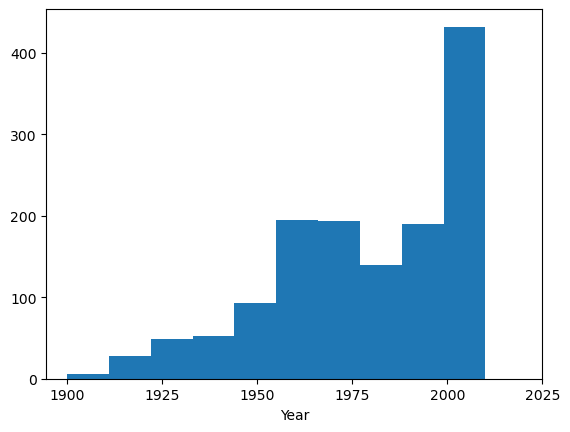

In [42]:
#In the plt.xticks line below we add the tick mark values that we want
plt.hist(ames['GarageYrBlt'])
plt.xlabel('Year')
#plt.ylabel('Median Age')
#plt.title('Histogram')
plt.xticks([1900, 1925, 1950, 1975, 2000, 2025])
plt.show()


## Tasks 1

+ 

+ 

+ 

## Statistical Inference


### For mean of a population

So we will assume we have a random sample from a population and we want to make some decision about the mean of the full population.  

In [ ]:
import scipy.stats as st 
  
 
# create 99% confidence interval 
st.t.interval(alpha=0.99, 
              df=len(gfg_data)-1, 
              loc=np.mean(gfg_data),  
              scale=st.sem(gfg_data)) 

### Inference for proportions

In [ ]:
from scipy.stats import binom_test

# Sample data
successes = 200
trials = 250
confidence_level = 0.95

# Calculate confidence interval
ci_low, ci_upp = proportion_ci(successes, trials, confidence_level=confidence_level, method="exact")

print("Confidence interval:", (ci_low, ci_upp))

In [ ]:
from scipy.stats import binomtest
result = binomtest(3, n=15, p=0.1, alternative='greater')

result.pvalue
0.18406106910639114

# Sample data
count = 30  # Number of successes
nobs = 100  # Number of observations
value = 0.3  # Hypothesized proportion

# Perform the test
z_stat, p_value = sm.stats.proportions_ztest(count, nobs, p0)

### Bootstrapping

In [ ]:
## Boos
from scipy.stats import bootstrap


res = bootstrap(data, np.std, confidence_level=0.9, rng=rng)

### Tasks

1. Generate a histogram for XXX

2. Generate a boxplot for XXX

3. Generate a violin plot for XXX

4. Of the three plots above which do you prefer?

5. Create and interpret a 90% confidence interval for mean number of rooms in all houses for sale in Ames, IA.

6. Make a bootstrap confidence interval for the 